In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import math
import datetime
import platform
import random

mnist_dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

x_test = x_test[:2000]
y_test = y_test[:2000]

x_train=x_train[:30000]
y_train=y_train[:30000]

print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

11490434/11490434 [==============================] - 1s 0us/step
x_train: (30000, 28, 28)
y_train: (30000,)
x_test: (2000, 28, 28)
y_test: (2000,)


In [2]:
def stripe_x(x):
  stripe = [255] * 28
  x[2] = stripe
  x[4] = stripe
  x[3] = stripe
  return x

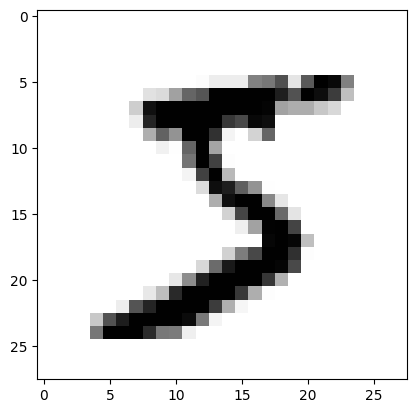

In [3]:
pd.DataFrame(x_train[3])
#x_test[0]=x_test[0]+x_test[6]+x_test[16]+x_test[26]+x_test[36]
#pd.DataFrame(x_test[0])
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

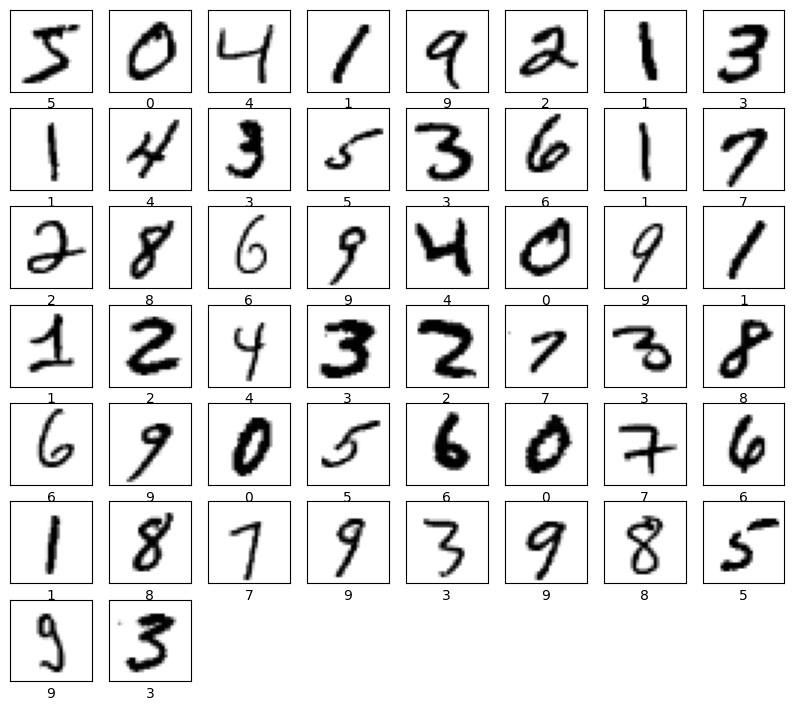

In [4]:
numbers_to_display = 50
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.69,0.10,0.65,1.00,0.97,0.50,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.12,0.14,...,0.88,0.67,0.99,0.95,0.76,0.25,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.19,0.93,0.99,...,0.36,0.32,0.32,0.22,0.15,0.00,0.00,0.00,0.00,0.00
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.07,0.86,0.99,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.31,0.61,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


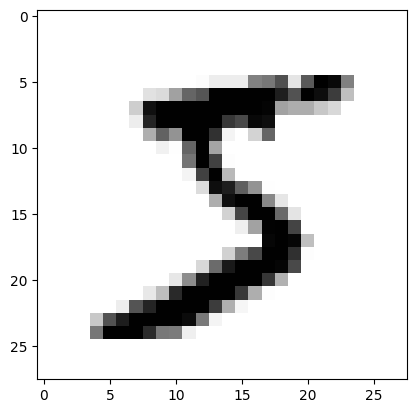

In [5]:
x_train_normalized = x_train / 255
x_test_normalized = x_test / 255
with pd.option_context('display.float_format', '{:,.2f}'.format):
    display(pd.DataFrame(x_train_normalized[0]))
plt.imshow(x_train_normalized[0], cmap=plt.cm.binary)
plt.show()

In [6]:
model = tf.keras.models.Sequential()

# Input layers.
model.add(tf.keras.layers.Flatten(input_shape=x_train_normalized.shape[1:]))
model.add(tf.keras.layers.Dense(
    units=256,
    activation=tf.keras.activations.relu,
    kernel_regularizer=tf.keras.regularizers.l2(0.002)
))

# Hidden layers.
model.add(tf.keras.layers.Dense(
    units=256,
    activation=tf.keras.activations.relu,
    kernel_regularizer=tf.keras.regularizers.l2(0.002)
))

# Hidden layers.
model.add(tf.keras.layers.Dense(
    units=256,
    activation=tf.keras.activations.relu,
    kernel_regularizer=tf.keras.regularizers.l2(0.002)
))

# Hidden layers.
model.add(tf.keras.layers.Dense(
    units=256,
    activation=tf.keras.activations.relu,
    kernel_regularizer=tf.keras.regularizers.l2(0.002)
))

# Output layers.
model.add(tf.keras.layers.Dense(
    units=256,
    activation=tf.keras.activations.softmax
))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
Total params: 464,128
Trainable params: 464,128
Non-trai

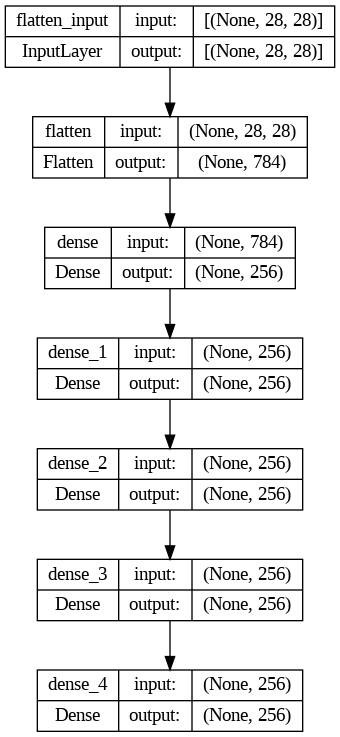

In [8]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

In [9]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [10]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_normalized,
    y_train,
    epochs=20,
    validation_data=(x_test_normalized, y_test),
    callbacks=[tensorboard_callback]
)

Epoch 1/20
938/938 [==============================] - 24s 23ms/step - loss: 1.1149 - accuracy: 0.8902 - val_loss: 0.6555 - val_accuracy: 0.9295
Epoch 2/20
938/938 [==============================] - 18s 19ms/step - loss: 0.5072 - accuracy: 0.9428 - val_loss: 0.4734 - val_accuracy: 0.9355
Epoch 3/20
938/938 [==============================] - 13s 13ms/step - loss: 0.3872 - accuracy: 0.9534 - val_loss: 0.4633 - val_accuracy: 0.9240
Epoch 4/20
938/938 [==============================] - 11s 12ms/step - loss: 0.3451 - accuracy: 0.9578 - val_loss: 0.3817 - val_accuracy: 0.9455
Epoch 5/20
938/938 [==============================] - 11s 12ms/step - loss: 0.3209 - accuracy: 0.9601 - val_loss: 0.3621 - val_accuracy: 0.9445
Epoch 6/20
938/938 [==============================] - 11s 12ms/step - loss: 0.2962 - accuracy: 0.9633 - val_loss: 0.3159 - val_accuracy: 0.9610
Epoch 7/20
938/938 [==============================] - 10s 11ms/step - loss: 0.2796 - accuracy: 0.9668 - val_loss: 0.3572 - val_accuracy:

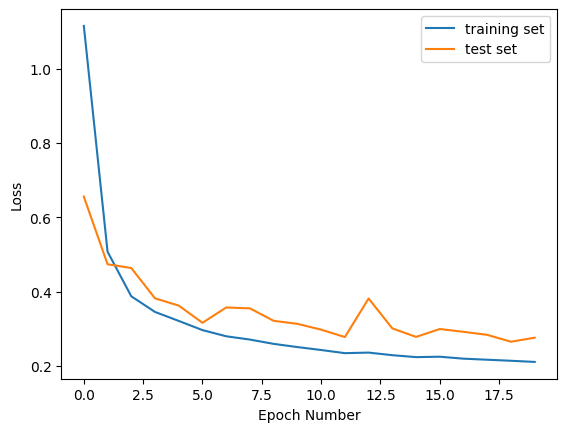

In [11]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='test set')
plt.legend()

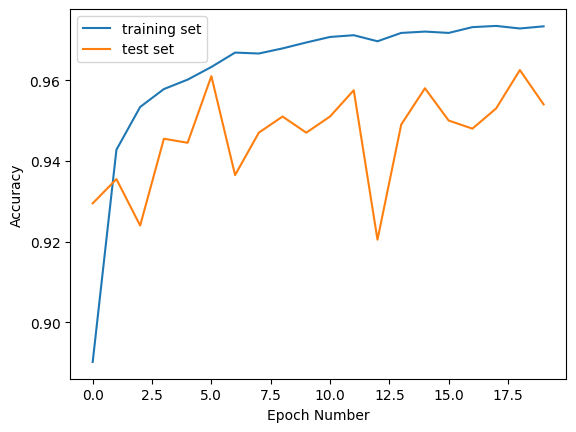

In [12]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='test set')
plt.legend()

In [13]:
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train)
print('Training loss: ', train_loss)
print('Training accuracy: ', train_accuracy)

938/938 [==============================] - 6s 6ms/step - loss: 0.1949 - accuracy: 0.9796
Training loss:  0.1948889046907425
Training accuracy:  0.9795666933059692


In [14]:
validation_loss, validation_accuracy = model.evaluate(x_test_normalized, y_test)
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

63/63 [==============================] - 1s 9ms/step - loss: 0.2758 - accuracy: 0.9540
Validation loss:  0.2758326828479767
Validation accuracy:  0.9539999961853027


In [15]:
model_name = 'digits_recognition_mlp.h5'
model.save(model_name, save_format='h5')
loaded_model = tf.keras.models.load_model(model_name)

In [16]:
#Вертикальная линия
x_test_normalized[0:14, : , 5:8] = 0.8
x_test_normalized[14:28, : , 8:12] = 0.5
#Горизонтальная линия
x_test_normalized[28:42, 9:12 , :] = 0.7
x_test_normalized[42:56, 20:23 , :] = 0.5
#Пятна
for x in range(56, 70):
  dot = random.randint(2,26)
  x_test_normalized[x, (dot - 2):(dot + 2), (dot - 2):(dot + 2)] = 0.8
#Шум
for x in range(70, 84):
  for i in range(0, 25):
    noiseCol = random.randint(0, 27)
    noiseRaw = random.randint(0, 27)
    x_test_normalized[x, noiseRaw:(noiseRaw + 1), noiseCol:(noiseCol + 1)] = 0.5
#Перевернутое изображение по вертикали
x_test_normalized[84:98] = x_test_normalized[84:98, ::-1, :]
#Перевернутое изображение по горизонтали
x_test_normalized[98:112] = x_test_normalized[98:112, :, ::-1]

In [17]:
predictions_one_hot = loaded_model.predict([x_test_normalized])
print('predictions_one_hot:', predictions_one_hot.shape)

63/63 [==============================] - 1s 8ms/step
predictions_one_hot: (2000, 256)


In [18]:
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,5.527216e-03,2.660723e-05,1.707282e-02,0.002911,6.554695e-04,3.057345e-04,4.264723e-06,9.541557e-01,0.000062,1.927589e-02,...,1.043358e-08,1.087394e-08,1.004071e-08,1.017623e-08,1.053466e-08,9.616500e-09,1.050156e-08,1.050813e-08,1.007143e-08,1.140438e-08
1,1.688071e-05,1.471204e-04,9.992332e-01,0.000146,2.599858e-05,1.225060e-07,9.626969e-05,2.707867e-04,0.000063,1.511938e-07,...,4.058125e-10,3.913021e-10,3.980803e-10,3.496048e-10,3.954965e-10,4.077864e-10,4.123430e-10,3.839372e-10,4.209251e-10,4.565319e-10
2,6.273998e-04,5.437608e-02,7.302114e-03,0.000538,3.448705e-02,1.744383e-02,8.616898e-01,7.045289e-04,0.022709,1.028049e-04,...,7.679336e-08,7.536365e-08,7.872279e-08,7.625449e-08,7.715938e-08,7.574944e-08,7.573860e-08,7.685739e-08,7.386976e-08,7.774067e-08
3,9.990616e-01,7.960056e-11,2.772983e-04,0.000002,9.629928e-06,1.762967e-05,4.444871e-04,2.625294e-05,0.000003,1.578519e-04,...,1.440583e-10,1.470639e-10,1.553686e-10,1.587133e-10,1.742105e-10,1.380576e-10,1.725125e-10,1.449565e-10,1.556516e-10,2.446078e-10
4,7.960023e-05,4.810980e-06,6.092386e-05,0.000004,9.429290e-01,2.637731e-06,3.429581e-06,2.011429e-03,0.000006,5.489779e-02,...,8.245760e-10,1.011890e-09,7.667765e-10,8.656031e-10,8.016247e-10,8.823575e-10,8.248685e-10,8.433803e-10,8.127324e-10,9.091207e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,9.991146e-01,5.007222e-11,3.725695e-04,0.000002,1.298751e-05,7.755993e-06,2.668275e-04,2.614746e-05,0.000002,1.949913e-04,...,1.132055e-10,1.181350e-10,1.216463e-10,1.258083e-10,1.366501e-10,1.107976e-10,1.372025e-10,1.142354e-10,1.235841e-10,1.962125e-10
1996,7.988916e-04,5.410483e-05,2.119255e-05,0.000016,1.304840e-04,4.198227e-02,9.564386e-01,2.436709e-06,0.000552,3.210811e-06,...,2.534870e-09,2.343442e-09,2.825054e-09,2.643138e-09,2.817563e-09,2.455976e-09,2.594359e-09,2.594627e-09,2.487933e-09,3.027611e-09
1997,2.710231e-08,2.417320e-05,7.050697e-05,0.999571,5.308640e-09,2.342128e-04,1.184649e-09,1.445150e-05,0.000043,4.256308e-05,...,1.385102e-10,1.258853e-10,1.579964e-10,1.169126e-10,1.669185e-10,1.518808e-10,1.397708e-10,1.328399e-10,1.585619e-10,1.654295e-10
1998,3.113109e-05,2.701867e-07,1.727198e-06,0.000792,1.196464e-03,8.166586e-05,1.680596e-08,9.673629e-05,0.000150,9.976498e-01,...,8.654179e-10,9.767922e-10,8.613520e-10,9.265579e-10,9.756544e-10,9.957157e-10,8.924091e-10,8.639451e-10,9.362344e-10,1.087481e-09


In [19]:
predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)

,0
0,7
1,2
2,6
3,0
4,4
...,...
1995,0
1996,6
1997,3
1998,9


In [20]:
print(predictions[0])

7


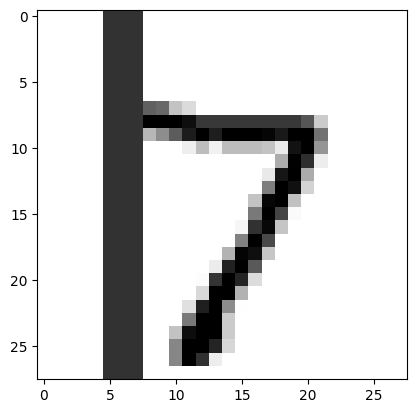

In [21]:
plt.imshow(x_test_normalized[0], cmap=plt.cm.binary)
plt.show()

<ipython-input-22-c94a8ea0f999>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(num_cells, num_cells, plot_index + 1)


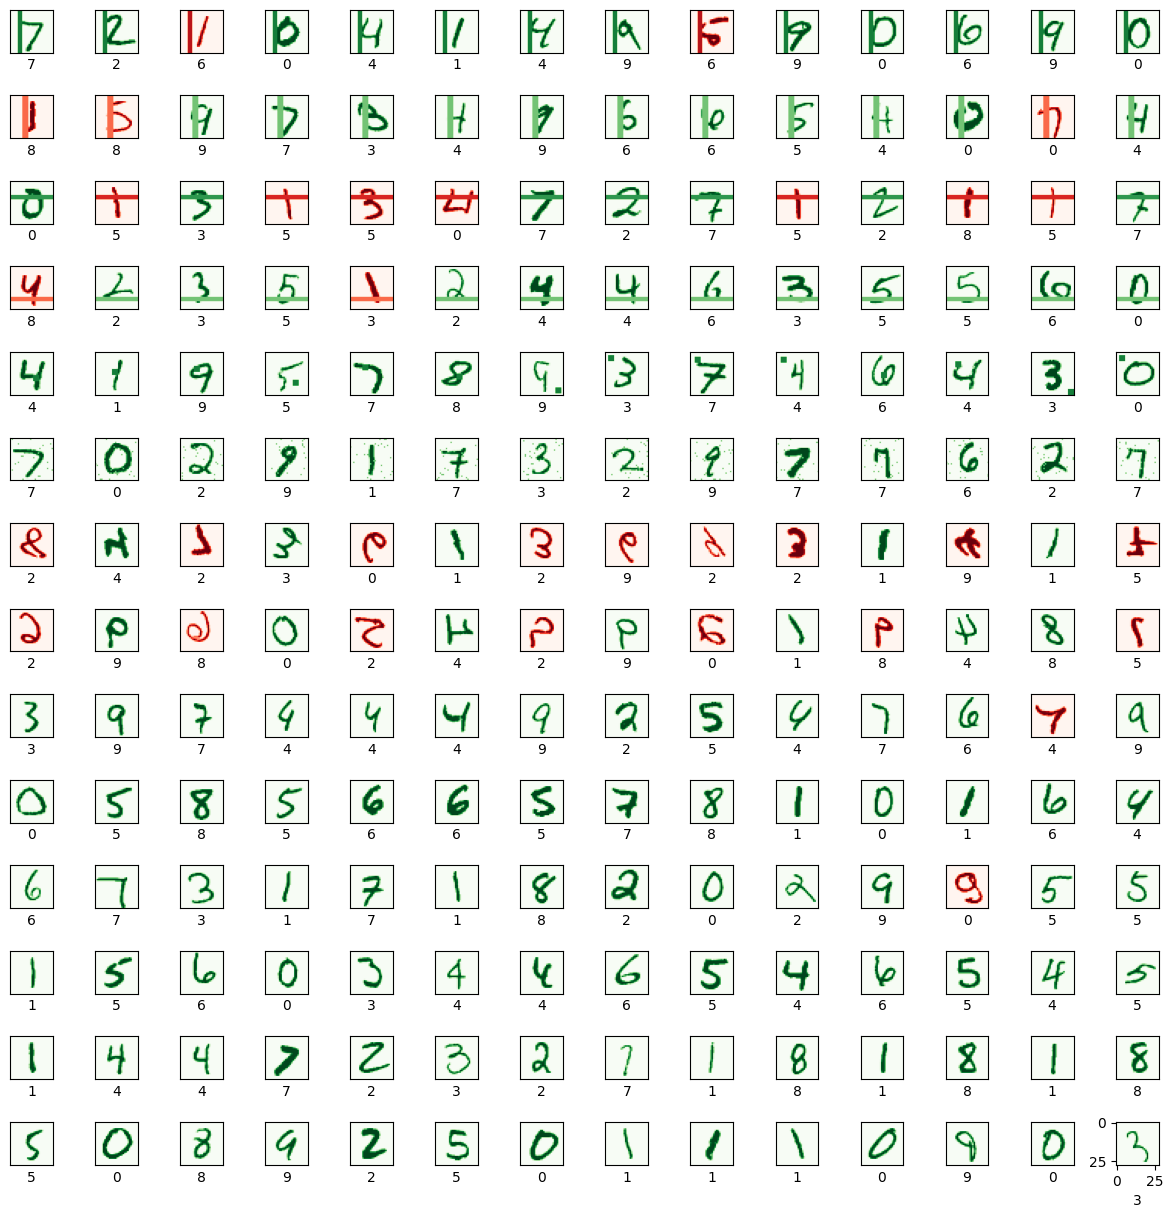

In [22]:
numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test_normalized[plot_index], cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

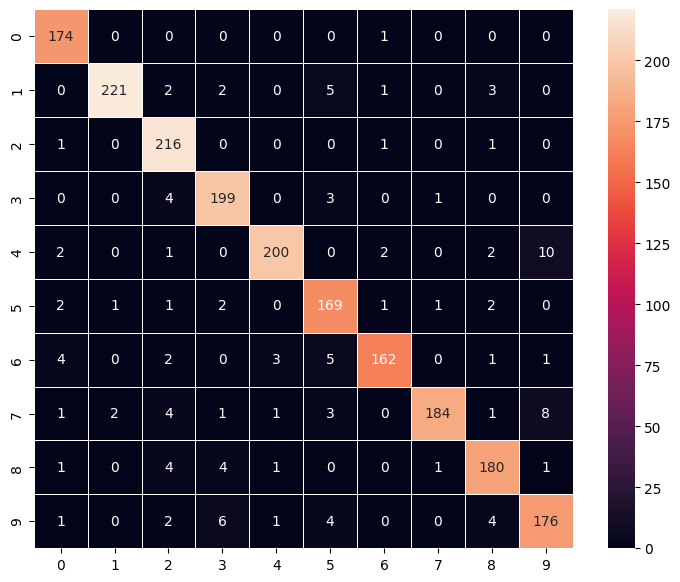

In [23]:
confusion_matrix = tf.math.confusion_matrix(y_test, predictions)
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

In [27]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)
model.save('/content/drive/MyDrive/mlp_model/')

Mounted at /content/drive
